# <u>No Show Patient Appointments<u>
## Can you predict if a patient will show up to their appointment?

### Table of Contents
> <ul>
> <li><a href="#intro">Introduction</a></li>
> <li><a href="#wrangling">Data Wrangling</a></li>
> <li><a href="#cleansing">Data Cleansing</a></li>    
> <li><a href="#eda">Exploratory Data Analysis</a></li>
> <li><a href="#conclusions">Conclusions</a></li>
> </ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

**I will be exploring this dataset and seeing if there are any factors that may show a higher probability and/or correlation of patients who do not show up for their scheduled appointments.**

There are 110,527 rows of medical appointments and 14 characteristics of those appointments.

##### <u> The following characteristics in the dataset are True/False (1/0): <u>
> - Scholarship
> - Hipertension
> - Diabetes
> - Alcoholism
> - Handcap
> - SMS_received
> - No-show

This dataset was originally sourced from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I'm going to start by loading the data and inspecting it. Then I will take the necessary steps to clean and answer the question "Can you predict if a patient will show up to their appointment?"

### General Properties

In [2]:
#Loading dataset with Pandas.read_csv
appts = pd.read_csv('noshowappointments_may2016.csv')

#Previewing the first 5 columns of the dataset
appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Retrieving some general information about the dataset and its characteristics
appts.info()

#Seeing all the unique values in the columns
appts.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**There seems to be more than one appointment for some patients. That may be something useful to look into for predicting if a patient will show up or not, but I will not be covering that in this project.**

In [4]:
#Checking all values and statistics of columns
appts.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='cleansing'></a>
## Data Cleansing

> ##### **List of cleaning steps:**
> - Remove duplicates, null values, and any rows with unfixable human error.
> - Change the datatype of a few columns
> - Convert a few columns to numbers (i.e. No-show from Yes/No to 1/0)
> - Pull days of week out of AppointmentDay
> - Rename columns for uniformity and ease of use
> - Create new columns and create bins/groups of information
>
>

### Time to Clean!

In [5]:
#Checking for duplicate rows
sum(appts.duplicated())

0

In [6]:
#Checking for empty/na values
appts.isnull().sum().any()

False

In [7]:
#Creating dataframe of all negative values from Age column (As seen in appts.describe() above)
age_errors = appts.query('Age < 0')
age_errors

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
#Removing all negative values from Age since we have a large dataset
# and a missing row wouldn't have a significant impact
appts.drop(age_errors.index, inplace=True)

In [9]:
#Checking that the negative age rows have been dropped
appts.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#Removing a couple columns I know I won't need anymore
appts.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#Previewing dataset
appts.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### More Cleaning
> At this point, I am going to convert a few existing columns to new columns, then delete more columns I don't need.
> I like to size down in pieces to lessen the burden of removing a large chunk of columns at the end.
> <p> First, I am going to convert the date columns to datetime (since they are strings at the moment). Then I am going to extract data from them and delete the original columns.

In [11]:
#Converting both date columns to date format.
#I am only concerned with the date since there was no time for the AppointmentDay column
appts['ScheduledDay'] = pd.to_datetime(pd.to_datetime(appts['ScheduledDay']).dt.date)
appts['AppointmentDay'] = pd.to_datetime(pd.to_datetime(appts['AppointmentDay']).dt.date)

#Double checking that they converted and look correct
appts.info()
appts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  int64         
 6   Hipertension    110526 non-null  int64         
 7   Diabetes        110526 non-null  int64         
 8   Alcoholism      110526 non-null  int64         
 9   Handcap         110526 non-null  int64         
 10  SMS_received    110526 non-null  int64         
 11  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Pulling the "Day of the Week" from the AppointmentDay Date. This will be used for analysis later.
appts['appt_day_of_week'] = appts['AppointmentDay'].dt.day_of_week

#Moving the new column to my preferred location
column_to_move = appts.pop('appt_day_of_week')
appts.insert(4, 'appt_day_of_week', column_to_move)

#Checking work
appts.head()

,Gender,ScheduledDay,AppointmentDay,Age,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,4,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,4,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,4,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,4,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,4,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Extracting the amount of time between the day patients scheduled their appointments
#  and the day of their appointment
days_between = (appts['AppointmentDay'] - appts['ScheduledDay']).dt.days

#Moving the new column to my preferred location
appts.insert(3, 'days_between', days_between)

#Checking work
appts.head()

,Gender,ScheduledDay,AppointmentDay,days_between,Age,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,0,62,4,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,4,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,4,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,4,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,4,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#Moving the Age column closer to gender since those are descriptions of the patients
move_column = appts.pop('Age')
appts.insert(1, 'Age', move_column)

#Checking work
appts.head()

,Gender,Age,ScheduledDay,AppointmentDay,days_between,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,2016-04-29,2016-04-29,0,4,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,2016-04-29,2016-04-29,0,4,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,2016-04-29,2016-04-29,0,4,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,2016-04-29,2016-04-29,0,4,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,2016-04-29,2016-04-29,0,4,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Checking statistics of new days_between column
appts.days_between.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_between, dtype: float64

In [16]:
#There shouldn't be negative values
# Negative values indicate the AppointmentDay was before the scheduled day
#  which is most likely a human error. So we will remove the rows
negative = appts.query('days_between < 0')

#Checking output
negative

,Gender,Age,ScheduledDay,AppointmentDay,days_between,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,38,2016-05-10,2016-05-09,-1,0,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,19,2016-05-18,2016-05-17,-1,1,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,22,2016-05-05,2016-05-04,-1,2,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,81,2016-05-11,2016-05-05,-6,3,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,7,2016-05-04,2016-05-03,-1,1,TABUAZEIRO,0,0,0,0,0,0,Yes


In [17]:
#Removing these rows with negative days_between
# This small amount won't severely effect our analysis
appts.drop(negative.index, inplace=True)

#Checking that we removed them
appts.query('days_between < 0')

,Gender,Age,ScheduledDay,AppointmentDay,days_between,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [18]:
#Getting rid of all the columns I no longer need
appts.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

#Checking work
appts.head()

,Gender,Age,days_between,appt_day_of_week,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,4,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,0,4,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,0,4,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,0,4,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,0,4,JARDIM DA PENHA,0,1,1,0,0,0,No


## Next steps
> Now, I am going to convert a few columns into categories.
> <p> This will help create better graphs since the information will be broken down into buckets.

In [19]:
#Starting with days_between, I will get the statistical information and group them as such.
appts.days_between.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_between, dtype: float64

In [20]:
#Creating bins from the min, 50%, 75%, and max numbers
bin_edges = [-1, 0, 4, 15, 179]

#Creating names for the newly formed bins
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']

#placing the bins and categories into a new column
waiting_period = pd.cut(appts['days_between'], bin_edges, labels=bin_names)

#Inserting column
appts.insert(4, 'waiting_period', waiting_period)

#Checking work
appts.head()

,Gender,Age,days_between,appt_day_of_week,waiting_period,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,4,0 days,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,0,4,0 days,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,0,4,0 days,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,0,4,0 days,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,0,4,0 days,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#Getting statistical information for Age column
appts.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [22]:
#Repeating steps from days_between for ages
bin_edges = [-1, 18, 37, 55, 115]

bin_names = ['0-18','19-37','38-55','56 and above']

age_group = pd.cut(appts['Age'], bin_edges, labels=bin_names)

appts.insert(1, 'age_group', age_group)

appts.head()

,Gender,age_group,Age,days_between,appt_day_of_week,waiting_period,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,56 and above,62,0,4,0 days,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56 and above,56,0,4,0 days,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,56 and above,62,0,4,0 days,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,0-18,8,0,4,0 days,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56 and above,56,0,4,0 days,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
#Getting rid of all the columns I no longer need
appts.drop(['Age', 'days_between'], axis=1, inplace=True)

#Checking work
appts.head()

,Gender,age_group,appt_day_of_week,waiting_period,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,56 and above,4,0 days,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56 and above,4,0 days,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,56 and above,4,0 days,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,0-18,4,0 days,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56 and above,4,0 days,JARDIM DA PENHA,0,1,1,0,0,0,No


### Just a few more steps!
> Now that I've created all the new columns I want, I am going to fix the column names and work on fixing the information from the existing columns.

In [24]:
#Making all column names lowercase and making sure there is no leading or trailing spaces
appts.rename(columns = lambda x: x.strip().lower(), inplace=True)

#Checking work
appts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   gender            110521 non-null  object  
 1   age_group         110521 non-null  category
 2   appt_day_of_week  110521 non-null  int64   
 3   waiting_period    110521 non-null  category
 4   neighbourhood     110521 non-null  object  
 5   scholarship       110521 non-null  int64   
 6   hipertension      110521 non-null  int64   
 7   diabetes          110521 non-null  int64   
 8   alcoholism        110521 non-null  int64   
 9   handcap           110521 non-null  int64   
 10  sms_received      110521 non-null  int64   
 11  no-show           110521 non-null  object  
dtypes: category(2), int64(7), object(3)
memory usage: 9.5+ MB


In [25]:
#A few things are mispelled and still need to be fixed. Continuing the renaming process
appts.rename(columns = {'hipertension' : 'hypertension', 'handcap' : 'handicap', 'no-show' : 'no_show'}, inplace = True)

#Checking work
appts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   gender            110521 non-null  object  
 1   age_group         110521 non-null  category
 2   appt_day_of_week  110521 non-null  int64   
 3   waiting_period    110521 non-null  category
 4   neighbourhood     110521 non-null  object  
 5   scholarship       110521 non-null  int64   
 6   hypertension      110521 non-null  int64   
 7   diabetes          110521 non-null  int64   
 8   alcoholism        110521 non-null  int64   
 9   handicap          110521 non-null  int64   
 10  sms_received      110521 non-null  int64   
 11  no_show           110521 non-null  object  
dtypes: category(2), int64(7), object(3)
memory usage: 9.5+ MB


> Now I am going to change the column information in handicap and no_show to be integers.
> This will help us to plot graphs and get a better overview of the information at hand.

In [26]:
#Changing no_show to 0/1 from No/Yes
appts.no_show.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

#Checking Work
appts.head()

,gender,age_group,appt_day_of_week,waiting_period,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,56 and above,4,0 days,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56 and above,4,0 days,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,56 and above,4,0 days,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,0-18,4,0 days,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56 and above,4,0 days,JARDIM DA PENHA,0,1,1,0,0,0,0


In [27]:
#Checking all the different inputs for handicap
appts.handicap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handicap, dtype: int64

In [28]:
#We just want a general answer for if someone with a handicap misses their appointment
# So I am going to change all numbers above 1 handicap to 1.
#  This will work as a True/False column
appts['handicap'] = np.where(appts['handicap'] > 1, 1, appts['handicap'])

#Checking work
appts.handicap.value_counts()

0    108282
1      2239
Name: handicap, dtype: int64

>**Cleaning has been completed!**
>
>Time to explore!

<a id='eda'></a>
## Exploratory Data Analysis

> Now I am going to explore and answer questions based off the initial one and see if there are factors that can predict when a patient will not show up for their scheduled appointment.

### 1. What percentage of scheduled appointments were no-shows?

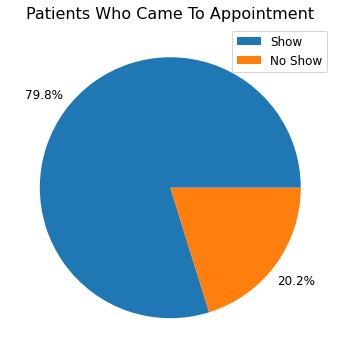

In [29]:
# Creating pie chart
labels = ['Show', 'No Show']

plt.figure(figsize = (6,6))
plt.pie(appts['no_show'].value_counts(), autopct = '%.1f%%', pctdistance = 1.2, textprops = {'fontsize' : 12})
plt.legend(labels, loc = None, prop = {'size' : 12})
plt.title('Patients Who Came To Appointment', fontdict = {'fontsize' : 16})

plt.show()

> **Less than a quarter of all the appointments were no-shows. Next, let's dive into that 20.2% and see what characteristics make up the no-shows.**

### 2. Is gender a factor that can be used to predict if a patient will show-up to their appointment?

In [30]:
#Grabbing the percentages to plot with graph
appts.groupby('gender').no_show.mean() * 100

gender
F    20.311543
M    19.963810
Name: no_show, dtype: float64

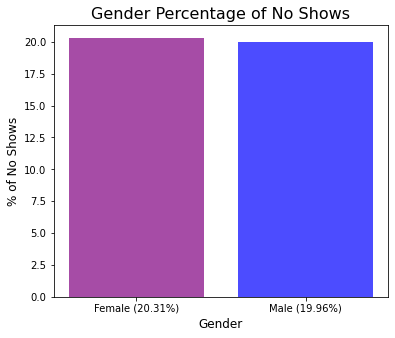

In [31]:
#Creating a graph that shows percentage of males/females that did not show up to their appointment
g_per = appts.groupby('gender').no_show.mean() * 100
values = appts.gender.unique()
colors = ['purple', 'blue']

plt.figure(figsize = (6,5))
plt.bar(values, g_per, color = colors, alpha = 0.7)

plt.title('Gender Percentage of No Shows', fontsize = 16)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(('F','M'), ('Female (20.31%)', 'Male (19.96%)'))
plt.show()

> **According to the data, approximately 20% of all females and 20% of all males didn't show up to their respected appointments. With this information, gender could not be a factor used to predict if a patient will show-up to their appointment.**


### 3. Can you predict if a patient will show-up to their appointment by the amount of time between the day they scheduled the appointment and their appointment day?

In [32]:
#Creating a new dataset of information only pertaining to the no-show appointments
noshow = appts.query('no_show == 1')

In [33]:
#Obtaining percent values to check with graphs that everything is correct
(noshow.waiting_period.value_counts() / noshow.waiting_period.value_counts().sum()).sort_values() * 100

0 days                8.030833
1-4 days             20.570046
5-15 days            32.929999
16 days and above    38.469123
Name: waiting_period, dtype: float64

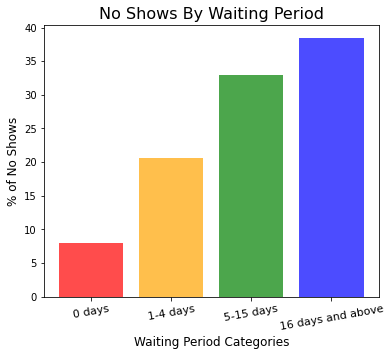

In [34]:
#Plotting Graph
wpx = noshow.waiting_period.unique().sort_values()
wpy = (noshow.waiting_period.value_counts() / noshow.waiting_period.value_counts().sum()).sort_values() * 100
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize = (6,5))
plt.bar(wpx, wpy, color = colors, alpha = 0.7)
    
plt.title('No Shows By Waiting Period', fontsize = 16)
plt.xlabel('Waiting Period Categories', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(fontsize = 11, rotation = 10)

plt.show()

> **According to the data, approximately 38% of all no shows were from patients that scheduled their appointments out by 16 days or more. Whilst viewing the graph you can seen a positive correlation between how many days the appointments were scheduled out and an increase in the amount of patients who missed their appointments. I would say this could be an indicator for predicting if patients will show up to their scheduled appointments.**


### 4. Can you predict if a patient will show-up to their appointment by their age group?

In [35]:
#Obtaining percent values to check with graphs that everything is correct
(noshow.age_group.value_counts() / noshow.age_group.value_counts().sum()).sort_index() * 100

0-18            28.439545
19-37           28.735323
38-55           23.545756
56 and above    19.279376
Name: age_group, dtype: float64

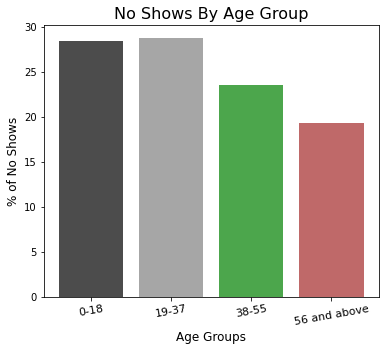

In [36]:
#Plotting Graph
ax = noshow.age_group.unique().sort_values()
ay = (noshow.age_group.value_counts() / noshow.age_group.value_counts().sum()).sort_index() * 100
colors = ['black', 'grey', 'green', 'brown']

plt.figure(figsize = (6,5))
plt.bar(ax, ay, color = colors, alpha = 0.7)
    
plt.title('No Shows By Age Group', fontsize = 16)
plt.xlabel('Age Groups', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(fontsize = 11, rotation = 10)

plt.show()

> **According to the data, approximately 57% of all no shows were from patients that were between the ages of 0 and 37. The slightly higher group of the two was 19-37 year olds by 0.3%. The amount of no-shows per age group starts to dwindle down at 38-55 and has the lowest percent once we reach the 56 and above age group. This could be taken into consideration when looking for factors of if a patient will show-up to their appointment.**

### 5. Can you predict if a patient will show-up to their appointment by the day of the week the appointment is on?

In [37]:
#Changing the appt_day_of_week column to an int dtype from str to be able to manipulate the graph how I want
noshow['appt_day_of_week'].astype(str).astype(int)

6         4
7         4
11        4
17        4
20        4
         ..
110484    1
110492    2
110496    2
110515    2
110516    2
Name: appt_day_of_week, Length: 22314, dtype: int32

In [38]:
#Obtaining percent values to check with graphs that everything is correct
(noshow.appt_day_of_week.value_counts() / noshow.appt_day_of_week.value_counts().sum()).sort_index() * 100

0    21.013713
1    23.079681
2    22.819754
3    14.954737
4    18.091781
5     0.040333
Name: appt_day_of_week, dtype: float64

- **When we pulled the day of the week out of the scheduled appointment day, it pulled numbers instead of words.**
- **For clarity, Monday is 0 and Sunday is 6.**

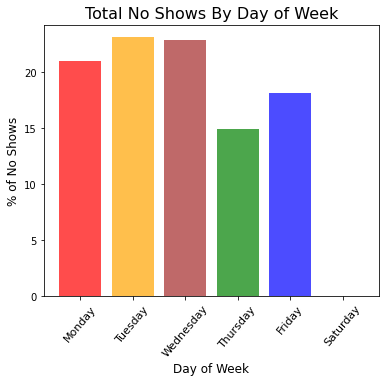

In [39]:
#Creating Graph
adx = noshow.sort_values('appt_day_of_week')['appt_day_of_week'].unique()
ady = (noshow.appt_day_of_week.value_counts() / noshow.appt_day_of_week.value_counts().sum()).sort_index() * 100
labels = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
colors = ('red', 'orange', 'brown', 'green', 'blue', 'purple')

plt.figure(figsize = (6,5))
plt.bar(adx, ady, color = colors, alpha = 0.7)
    
plt.title('Total No Shows By Day of Week', fontsize = 16)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1,2,3,4,5]), (labels) , fontsize = 11, rotation = 50)

plt.show()

> **According to the data, the highest percentage of missed appointments were on Tuesdays (~23%). Wednesdays were in close second with having approximately 22.8% of all no-shows. The interesting point of this data is that less than 1% of all no-shows were on Saturday. This could lead into more questions like 'Why did each patient miss their appointment?' Since all the missed appointments were mainly during the week, there could have been issues with school and/or work. Nonetheless, Tuesday and Wednesday held the most no-shows out of all the days of the week. This information could be used to predict if a patient will show up to their appointment.**

### 6. Can you predict if a patient will show-up to their appointment by the neighbourhood they live in?

In [40]:
#Grabbing value_counts of all neighbourhoods. Then I will limit to the top 5.
noshow.neighbourhood.value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     905
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

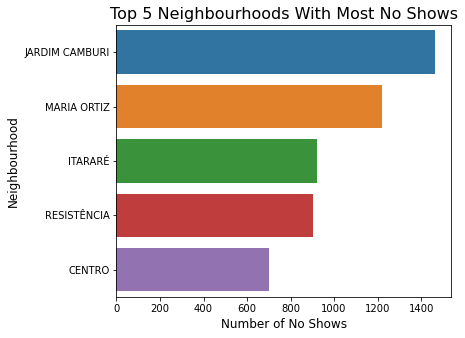

In [41]:
#Plotting graph
order = noshow.neighbourhood.value_counts().index[:5]

plt.figure(figsize = (6,5))
sns.countplot(data = noshow, y = 'neighbourhood', order = order)
plt.title('Top 5 Neighbourhoods With Most No Shows', fontsize = 16)
plt.xlabel('Number of No Shows', fontsize = 12)
plt.ylabel('Neighbourhood', fontsize = 12)

plt.show()

> **According to the data, the highest amount of missed appointments were from patients who scheduled appointments at the Jardim Camburi location. It leads the second most, Maria Ortiz, by 200 patients. Since there is a vast amount of neighbourhoods in this dataset, these top five could be used in conjuction with other factors to predict if a patient will show-up to their appointment.**

### 7. Can you predict if a patient will show-up to their appointment based on their state scholarship status?

In [42]:
##Obtaining percent values to check with graphs that everything is correct
(noshow.scholarship.value_counts() / noshow.scholarship.value_counts().sum()) * 100

0    88.446715
1    11.553285
Name: scholarship, dtype: float64

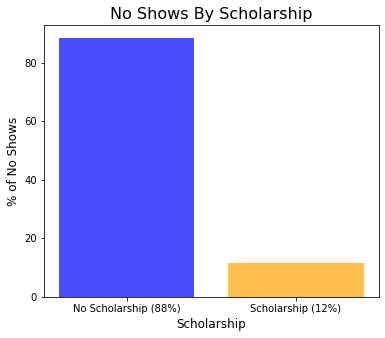

In [43]:
#Plotting Graph
sx = noshow.sort_values('scholarship')['scholarship'].unique()
sy = (noshow.scholarship.value_counts() / noshow.scholarship.value_counts().sum()) * 100
s_labels = ('No Scholarship (88%)', 'Scholarship (12%)')
colors = ['blue', 'orange']

plt.figure(figsize = (6,5))
plt.bar(sx, sy, color = colors, alpha = 0.7)
    
plt.title('No Shows By Scholarship', fontsize = 16)
plt.xlabel('Scholarship', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (s_labels))

plt.show()

> **According to the data, 88% of all no-shows were from people who were not receiving the state scholarship. That's an overwhelming amount and could definitely be used in predicting if a patient will show-up to their appointment.**

### 8. Can you predict if a patient will show-up to their appointment based on if they received a SMS message from the doctor's office?

In [44]:
##Obtaining percent values to check with graphs that everything is correct
(noshow.sms_received.value_counts() / noshow.sms_received.value_counts().sum()) * 100

0    56.153088
1    43.846912
Name: sms_received, dtype: float64

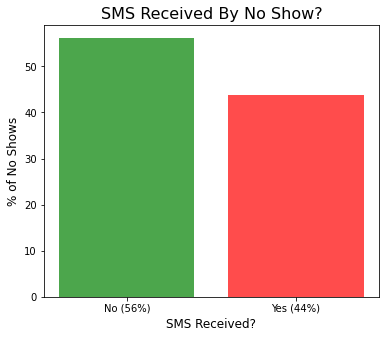

In [45]:
#Plotting Graph
smsx = noshow.sort_values('sms_received')['sms_received'].unique()
smsy = (noshow.sms_received.value_counts() / noshow.sms_received.value_counts().sum()) * 100
sms_labels = ('No (56%)', 'Yes (44%)')
colors = ['green', 'red']

plt.figure(figsize = (6,5))
plt.bar(smsx, smsy, color = colors, alpha = 0.7)
    
plt.title('SMS Received By No Show?', fontsize = 16)
plt.xlabel('SMS Received?', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (sms_labels))

plt.show()

> **56% of no-shows patients did not receive a SMS message from the doctor's office. This is still a tad more than half of all no shows, but I wouldn't say this is an overwhelming factor to consider.**

### 8. Can you predict if a patient will show-up to their appointment based on any conditions they may have (Hypertension, Diabetes, Alcoholism, Handicap)?

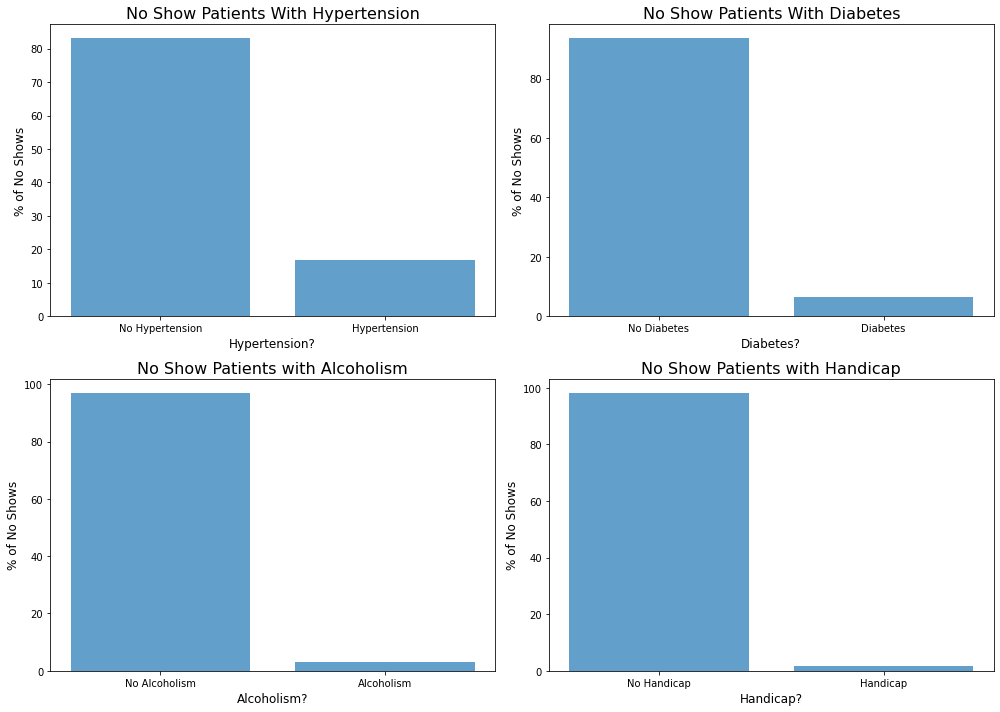

In [46]:
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
hx = noshow.sort_values('hypertension')['hypertension'].unique()
hy = (noshow.hypertension.value_counts() / noshow.hypertension.value_counts().sum()) * 100
hlabels = ('No Hypertension', 'Hypertension')
plt.bar(hx, hy, alpha = 0.7)
plt.title('No Show Patients With Hypertension', fontsize = 16)
plt.xlabel('Hypertension?', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (hlabels))

plt.subplot(2,2,2)
dx = noshow.sort_values('diabetes')['diabetes'].unique()
dy = (noshow.diabetes.value_counts() / noshow.diabetes.value_counts().sum()) * 100
dlabels = ('No Diabetes', 'Diabetes')
plt.bar(dx, dy, alpha = 0.7)
plt.title('No Show Patients With Diabetes', fontsize = 16)
plt.xlabel('Diabetes?', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (dlabels))

plt.subplot(2,2,3)
ax = noshow.sort_values('alcoholism')['alcoholism'].unique()
ay = (noshow.alcoholism.value_counts() / noshow.alcoholism.value_counts().sum()) * 100
alabels = ('No Alcoholism', 'Alcoholism')
plt.bar(ax, ay, alpha = 0.7)
plt.title('No Show Patients with Alcoholism', fontsize = 16)
plt.xlabel('Alcoholism?', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (alabels))

plt.subplot(2,2,4)
hax = noshow.sort_values('handicap')['handicap'].unique()
hay = (noshow.handicap.value_counts() / noshow.handicap.value_counts().sum()) * 100
halabels = ('No Handicap', 'Handicap')
plt.bar(hax, hay, alpha = 0.7)
plt.title('No Show Patients with Handicap', fontsize = 16)
plt.xlabel('Handicap?', fontsize = 12)
plt.ylabel('% of No Shows', fontsize = 12)
plt.xticks(([0,1]), (halabels))

plt.tight_layout()
plt.show()

> **According to the data, approximately 80% - 97% of each condition's no-shows were from patients that had no reported conditions. Patients who know they have a condition may feel more inclined to go to their appointments, while patients with no reported conditions are less likely to go to their appointments. This could definitely be used as a factor in predicting if a patient will show up to their appointment.**

<a id='conclusions'></a>
## Conclusions

To summarize, there are quite a few factors that could be used to predict if a patient will show-up to their appointment. The two that weren't as significant include factors such as gender and if the patient received an SMS from the Doctor's office.

### Limitations

A few limitations of this dataset include:
- If someone is ride dependent for their appointments
- The dataset only covers 40 days and could show different results if it covered a longer period of time
- Limited to only one country's medical appointments
- Dataset is 6 years old and needs to be updated.